In [1]:
import pandas as pd

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [3]:
credit = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\credit_final.csv')
credit.head(3)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

# 1. 데이터 분할과 성과분석
## 1절. 데이터 분할
- 데이터 분할은 train, validation, test data로 분할하여 모델 평가에 사용
- 전체데이터에서 각각 train(50%), validataion(30%), test(20%)로 분할하며, 
- 데이터의 갯수가 작으면 validation을 생략하고 training과 test를 6:4 또는 7:3으로 두고 분석을 진행.


In [5]:
X = credit.drop(['credit.rating'],axis = 1)
Y = credit['credit.rating']

In [6]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X,
                                                    Y,
                                                    random_state = 20,
                                                    test_size=0.3 #기본 0.25
                                                   )

## 2절. 성과분석
- 성과분석은 데이터마이닝을 통해 train set으로 모델링 한 뒤, 
- test set으로 정확도, 특이도 등을 알아보기 위한 과정

#### 1) confusionMatrix 

In [7]:
# confusionMatrix를 활용한 성과분석
predicted = [1,0,0,1,1,1,0,0,0,1,1,1]
actual =    [1,0,0,1,1,0,1,1,0,1,1,1]

# 분할표 그리기
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted, actual)
print(cf)

[[3 2]
 [1 6]]


In [8]:
# 정확도 구하기
# 1) 사이킷런 함수 이용
from sklearn.metrics import accuracy_score
accuracy_score(predicted, actual)

0.75

In [9]:
# 2) 직접 구하기
(cf[0,0] + cf[1,1]) / cf.sum()

0.75

####  2) ROC CURVE
- 이진 분류 분석 모형을 비교 분석 결과를 가시화할 수 있다는 점에서 유용한 평가 도구.
- 가로축은 1-특이도, 세로축은 민감도
- AUC가 넓을수록 좋은 모형

In [10]:
import numpy as np

In [11]:
from sklearn.metrics import roc_curve

In [12]:
FPR, TPR, _ = roc_curve(predicted, actual)

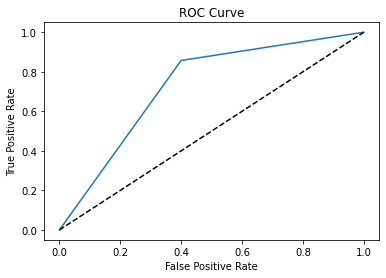

<Figure size 432x288 with 0 Axes>

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') # 대각선
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(actual, predicted)

0.75

# 2. 분류분석
- 분류분석은 데이터가 어떤 그룹에 속하는지 예측하는데 사용하는 기법.
- 의사결정나무, 앙상블기법, 인공신경망 등이 있음.
- ADP 실기에서는 **"분류기법들을 활용해 가장 정확도같은 지표가 좋은 기법과 결과를 보고서에 나타내라"** 는 형식의 문제가 출제됨.


In [15]:
X = credit.drop(['credit.rating'],axis = 1)
Y = credit['credit.rating']

In [16]:
X.shape, Y.shape

((1000, 20), (1000,))

In [17]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,random_state = 20,
                                                   test_size=0.3 #기본 0.25
                                                   )

## 1절. 로지스틱 회귀분석
- 반응변수가 범주형일 때 사용
- 새로운 설명변수가 주어질 때 반응변수의 각 범주에 속할 확률이 얼마인지를 추정하여 <br> **추정확률**을 기준치에 따라 분류하는 목적으로 활용

In [18]:
from sklearn.linear_model import LogisticRegression as LR
import statsmodels.api as sm

In [19]:
train_X.shape,train_Y.shape

((700, 20), (700,))

In [20]:
test_X.shape, test_Y.shape

((300, 20), (300,))

In [21]:
# 상수항 추가
##### 상수항 추가해줘야 centered 된다고 알고있는데,,, 할거면 train test 둘다 해줘야하나?
train_X = sm.add_constant(train_X, has_constant='add')
test_X = sm.add_constant(test_X, has_constant='add')

C:\Users\Boanerges\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
# 모델링
model = sm.Logit(train_Y, train_X)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.476048
         Iterations 7


In [23]:
results.aic # R 교재에서는 689

708.4670376853487

In [24]:
#예측을 통한 정확도 확인
pred_y = results.predict(test_X)

# 컷오프 함수
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

890    0
694    1
798    0
147    1
858    0
      ..
257    1
591    0
377    1
938    0
57     1
Length: 300, dtype: int32

In [25]:
cfmat = confusion_matrix(test_Y,pred_Y)
print(cfmat)

[[ 45  32]
 [ 38 185]]


In [26]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/ cfmat.sum() ## accuracy
    return(acc)

In [27]:
acc(cfmat)

0.7666666666666667

## 2절. 의사결정나무
-  tree함수는 불순도의 측도로 엔트로피 지수를 사용.

In [28]:
from sklearn.datasets import load_iris
from sklearn import tree

In [29]:
iris=load_iris()

In [30]:
from sklearn import tree

- train, test 분리
- cf.matrix 계산

In [31]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, stratify=iris.target,random_state=1)

In [32]:
clf4 = tree.DecisionTreeClassifier(criterion="entropy")

In [33]:
clf4.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
confusion_matrix(y_test,clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

#### Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
regr1 = tree.DecisionTreeRegressor(max_depth=5)

In [37]:
# 모델 피팅
regr1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [38]:
# 예측값
y1 = regr1.predict(X_test)

In [39]:
confusion_matrix(y_test,y1)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

## 3절. 앙상블 기법 
- 여러 개의 예측모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측 모형을 만드는 방법. <br> 학습방법이 가장 불안전한 의사결정나무에 주로 사용

### 1) 배깅 
- 여러개의 붓스트랩자료를 생성해 각 붓스트랩 자료에 예측모형을 만든 후 결합하여 최종 예측모형을 만드는 방법. 
- 붓스트랩; 주어진 자료에서 동일한 크기의 표본을 랜덤 복원추출로 뽑은 자료
- 보팅(voting); 여러 개의 모형으로부터 산출된 결과를 다수결에 의해 최종결과를 선정하는 과정
- 배깅에서는 가지치기를 하지 않고 최대로 성장한 의사결정나무 활용

In [40]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
#함수를 활용하여 분석 결과를 확인하기 보다 train한 데이터로 test 데이터를 예측하여 confusionMatrix를 주로 확인함
#아까 로지스틱으로 했을땐 accuracy 76.7%
X = credit.drop(['credit.rating'],axis = 1)
Y = credit['credit.rating']

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state = 20, test_size=0.3)

In [42]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(base_estimator = LR(), # 선형회귀모형
                                 n_estimators = 5, # 5번 샘플링
                                 verbose = 1) # 학습 과정 표시
linear_model2 = bagging_model.fit(train_x, train_y) # 학습 진행
predict2 = linear_model2.predict(test_x) # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
#print("RMSE: {}".format(sqrt(mean_squared_error(predict2, test_y)))) # RMSE 결과

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Boanerges\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Boanerges\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

In [43]:
pred_Y = cut_off(predict2,0.5)
#pred_Y

In [44]:
# accuracy 77.67%
cfmat = confusion_matrix(pred_Y,test_y)
acc(cfmat)

0.78

In [45]:
# auc  
roc_auc_score(test_y, pred_Y )

0.7159746083512899

### 2) 부스팅 
- 예측력이 약한 모형들의 결합하여 강한 예측모형을 만드는 방법  


In [46]:
# ex) 앞서 분할한 credit 데이터의 train 데이터로 부스팅 모델을 만들어 보자.
# Adaboost, Gradient boost

In [47]:
X.shape, Y.shape

((1000, 20), (1000,))

####  Adaboost


In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state = 20, test_size=0.3)

In [50]:
tree_model = DecisionTreeClassifier(max_depth = 5) # 트리 최대 깊이 5
Adaboost_model1 = AdaBoostClassifier(base_estimator = tree_model, # 트리모델을 기본으로 추정
                                     n_estimators = 20,
                                     random_state = 42) 
model1 = Adaboost_model1.fit(train_x, train_y) # 학습 진행

predict1 = model1.predict(test_x) # 평가 데이터 예측
accuracy_score(test_y, predict1) 

0.6833333333333333

#### Gradient boost
XGB

In [51]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_dtrain = xgb.DMatrix(data = train_x, label = train_y) # 학습 데이터를 XGBoost 모델에 맞게 변환
xgb_dtest = xgb.DMatrix(data = test_x) # 평가 데이터를 XGBoost 모델에 맞게 변환

xgb_param = {'max_depth': 10,
         'learning_rate': 0.01, # Step Size
         'n_estimators': 100, # Number of trees, 트리 생성 개수
         'objective': 'multi:softmax', # 목적 함수
        'num_class': len(set(train_y)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain) # 학습 진행
xgb_model_predict = xgb_model.predict(xgb_dtest) # 평가 데이터 예측

accuracy_score(test_y, xgb_model_predict)

In [ ]:
# roc curve 그리기
FPR, TPR, _ = roc_curve(xgb_model_predict, test_y)

#from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') # 대각선
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

In [ ]:
#from sklearn.metrics import roc_auc_score
roc_auc_score( test_y, xgb_model_predict)

### 3) 랜덤포레스트 
- 의사결정나무의 특징인 분산이 크다는 점을 고려하여 배깅과 부스팅보다 더 많은 무작위성을 줘서 약한 학습기들을 생성한 후
- 이를 선형결합하여 최종학습기를 만드는 방법


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model1 = RandomForestClassifier(n_estimators = 20, # 20번 추정
                                             max_depth = 5, # 트리 최대 깊이 5
                                             random_state = 42) # 시드값 고정

model1 = random_forest_model1.fit(train_x, train_y) # 학습 진행
predict1 = model1.predict(test_x) # 평가 데이터 예측

accuracy_score(test_y, predict1)

In [ ]:
roc_auc_score(test_y,predict1)

## 4절. SVM

- 기계학습 분야 중 하나로 패턴인식, 자료 분석 등을 위한 지도학습 모델
- 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어떤 범주에 속할 것인지를 판단하는 **비확률적** 이진 선형 분류 모델을 생성.


## 5절. 나이브 베이즈 분류
- 조건부 독립을 가정하는 알고리즘
- 클래스에 대한 사전 정보와 데이터로부터 추출된 정보를 결합하고, <br>베이즈 정리를 이용하여 어떤 데이터가 특정 클래스에 속하는지 분류하는 알고리즘

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
fitted = gnb.fit(train_x,train_y)
y_pred = fitted.predict(test_x)

In [ ]:
confusion_matrix(test_y, y_pred)

In [ ]:
# roc_auc_score(true, predict)
roc_auc_score(y_pred, test_y)

## 6절. KNN

- 지도학습
- 어떤 범주로 나누어져 있는 데이터셋이 있을 때, 새로운 데이터가 추가된다면 <br>이를 어떤 범주로 분류할 것인지를 결정하는 알고리즘
- 최근접 이웃 간의 거리를 계산할 때, 유클리디안, 멘하탄, 민코우스키 거리 등을 사용
- k의 선택은 일반적으로 **훈련데이터 개수의 제곱근**으로 설정

In [ ]:
from sklearn import neighbors

In [ ]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(train_x,train_y)

In [ ]:
y_pred = clf.predict(test_x)

In [ ]:
confusion_matrix(test_y,y_pred)

In [ ]:
roc_auc_score(y_pred, test_y)

In [ ]:
# 교재에서는 최적의 k가 19라네..?
accuracy = []
auc = []
for i in range(2,20):
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(train_x,train_y)
    y_pred = clf.predict(test_x)
    cfm = confusion_matrix(y_pred,test_y)
    accuracy.append(acc(cfm))
    auc.append(roc_auc_score(y_pred, test_y))

In [ ]:
print("acc 기준 최적의 k값 : {}, accuracy : {}".format(accuracy.index(max(accuracy)),max(accuracy)))
print("auc 기준 최적의 k값 : {}, accuracy : {}".format(auc.index(max(auc)),max(auc)))

## 7절. 인공신경망

# 3장 군집분석
## 1절. 군집분석

## 2절. 계층적 군집분석

## 3절. 비계층적 군집분석

## 4절. 혼합 분포 군집

# 4장 연관분석
## 1절. 연관규칙
연관규칙분석은 기업의 데이터베이스에서 상품의 구매, 서비스 등 일련의 거래 또는 사건들 간의 규칙을 발견하기 위해 적용. <br>
측도로는 지지도, 신뢰도, 향상도가 있다.

In [ ]:
#ex) 통신사의 고객 데이터를 입력하고 as함수로 데이터를 변형하고 inspect 함수로 데이터를 확인해보자.

cnt = pd.DataFrame({'id':[1,2,3,4,5,6],
                   'gender':["FEMALE", "MALE", "FEMALE", "FEMALE", "MALE", "FEMALE"],
                   'age':["age_20", "age_20", "age_40", "age_30", "age_40", "age_30"],
                   'rank':["Gold", "Silver", "Silver", "VIP", "Gold", "Gold"],
                   'mobile_app_use':["YES", "YES", "NO", "YES", "NO", "YES"],
                   're_order':["YES", "NO", "NO", "YES", "NO", "YES"]
                   })
cnt

In [ ]:
cnt.set_index('id')

inspect함수...